# Questions Classifier. Visualization of the training and validation results

The hyperparameter that have been tunned is the learning rate, because the initial training with a lr=5e-5 over-fitted the data. 


Learning rates of 5e-5, 3e-5 and 2e-5 have been tested and the best results are achieved with a learning rate of 2e-5

In [1]:
# from transformers import BertTokenizer, AdamW, get_linear_schedule_with_warmup, BertForSequenceClassification
# import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import pathlib
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
ROOT_DIR = pathlib.Path().resolve().parents[1]
print(f"Root directory: {ROOT_DIR}")
DATA_DIR_5 = ROOT_DIR/'qg'/'transformers_models'/'results_2022-06-20_1655742201.648833'

DATA_DIR_2 = ROOT_DIR/'qg'/'transformers_models'/'results_2022-06-29_1656525344.955264'

DATA_DIR_3 = ROOT_DIR/'qg'/'transformers_models'/'results_2022-06-29_1656530658.389673'

Root directory: C:\Users\DeboraOrsolich\Development\question_generation_models\deep_qg


In [3]:
import json

with open(DATA_DIR_5/"train_results_distilbert_base_cased_2022-06-20_1655742201.648833.json") as f:
    train_results_5e5 = json.load(f)

with open(DATA_DIR_5/"test_results_distilbert_base_cased_2022-06-30_1656584800.9610217.json") as f:
    val_results_5e5 = json.load(f)

with open(DATA_DIR_2/"train_results_distilbert_base_cased_2022-06-29_1656525344.955264.json") as f:
    train_results_2e5 = json.load(f)

with open(DATA_DIR_2/"test_results_distilbert_base_cased_2022-06-30_1656584656.5065176.json") as f:
    val_results_2e5 = json.load(f)

with open(DATA_DIR_3/"train_results_distilbert_base_cased_2022-06-29_1656530658.389673.json") as f:
    train_results_3e5 = json.load(f)

with open(DATA_DIR_3/"test_results_distilbert_base_cased_2022-06-30_1656584939.395717.json") as f:
    val_results_3e5 = json.load(f)

In [4]:
print(train_results_5e5.keys())
print()
print(val_results_5e5.keys())
print()
print(train_results_2e5.keys())
print()
print(val_results_2e5.keys())

print()
print(train_results_3e5.keys())
print()
print(val_results_3e5.keys())

dict_keys(['device', 'len_dataset', 'example_context', 'example_question', 'seed', 'test', 'dataset', 'dataset_split', 'model', 'model_name', 'learning_rate', 'adam_epsilon', 'batch_size', 'n_epochs', 'lr_decay', 'dropout', 'max_length_source', 'max_length_target', 'training_epoch_loss_values', 'training_batch_loss_values', 'training_epoch_accuracy_values', 'epoch_training_time', 'pred_y', 'true_y', 'task', 'total_training_time'])

dict_keys(['device', 'len_dataset', 'example_context', 'example_question', 'seed', 'test', 'results_folder', 'dataset', 'dataset_split', 'model', 'model_name', 'batch_size', 'n_epochs', 'max_length_source', 'max_length_target', 'validation_batch_loss_values', 'validation_epoch_loss_values', 'validation_epoch_accuracy_values', 'pred_y', 'true_y'])

dict_keys(['device', 'len_dataset', 'example_context', 'example_question', 'seed', 'test', 'dataset', 'dataset_split', 'model', 'model_name', 'learning_rate', 'adam_epsilon', 'batch_size', 'n_epochs', 'lr_decay', '

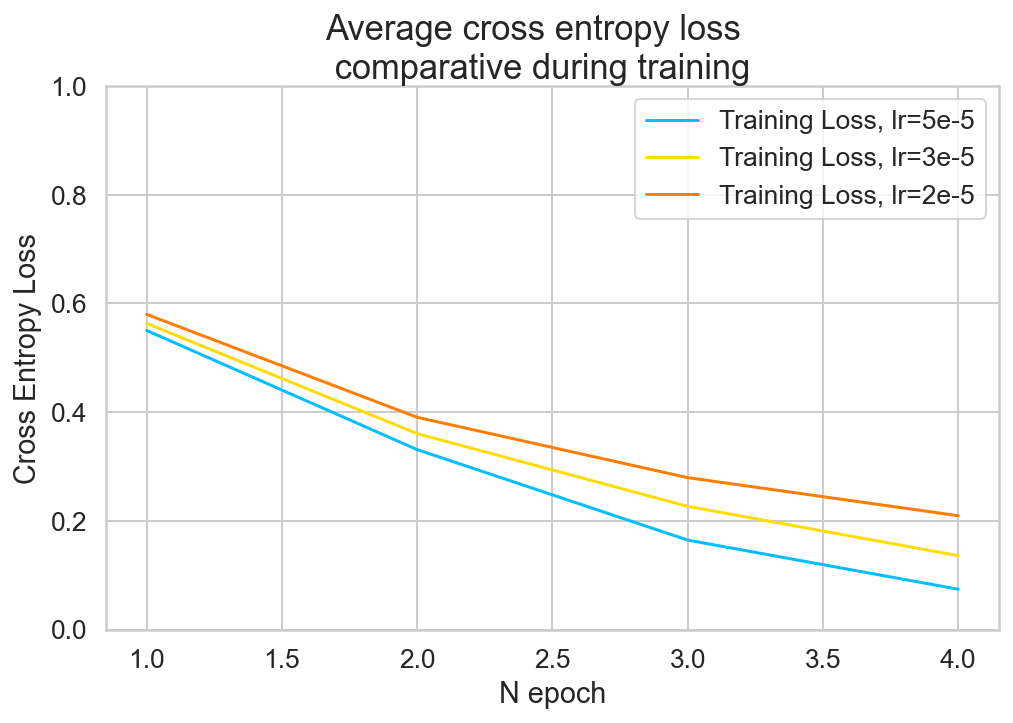

In [5]:
train_epoch_loss_5 = train_results_5e5["training_epoch_loss_values"]
train_epoch_loss_3 = train_results_3e5["training_epoch_loss_values"]
train_epoch_loss_2 = train_results_2e5["training_epoch_loss_values"]

epoch = [i for i in range(1, 5)]
plt.plot(epoch, train_epoch_loss_5, label="Training Loss, lr=5e-5")
plt.plot(epoch, train_epoch_loss_3, label="Training Loss, lr=3e-5")
plt.plot(epoch, train_epoch_loss_2, label="Training Loss, lr=2e-5")

plt.suptitle("Average cross entropy loss \n comparative during training")
plt.xlabel('N epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend()

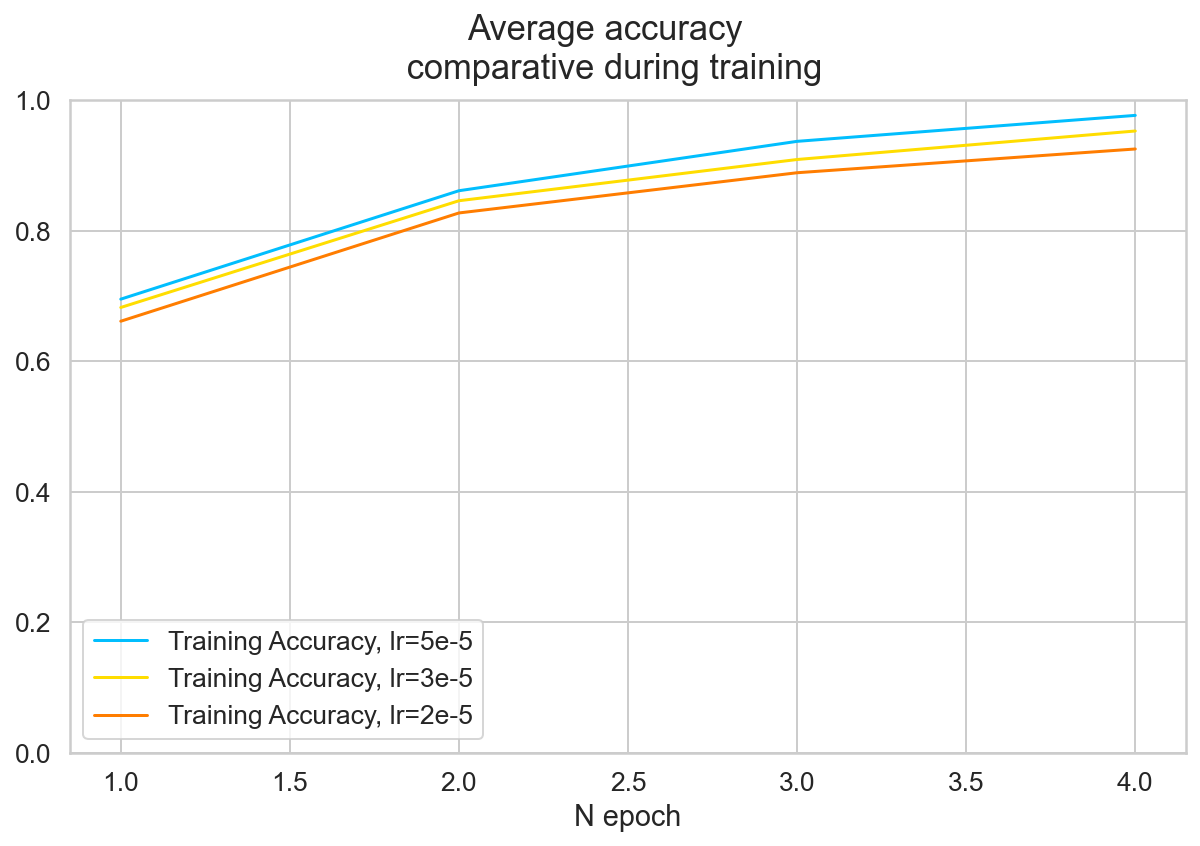

In [6]:
training_epoch_accuracy_5 = [dic["accuracy"] for dic in train_results_5e5["training_epoch_accuracy_values"]]
training_epoch_accuracy_3 = [dic["accuracy"] for dic in train_results_3e5["training_epoch_accuracy_values"]]
training_epoch_accuracy_2 = [dic["accuracy"] for dic in train_results_2e5["training_epoch_accuracy_values"]]

rcParams['figure.figsize'] = 10, 6
epoch = [i for i in range(1, 5)]
plt.plot(epoch, training_epoch_accuracy_5, label="Training Accuracy, lr=5e-5")#, color="royalblue")
plt.plot(epoch, training_epoch_accuracy_3, label="Training Accuracy, lr=3e-5")#, color="royalblue")
plt.plot(epoch, training_epoch_accuracy_2, label="Training Accuracy, lr=2e-5")#, color="royalblue")

plt.suptitle("Average accuracy \n comparative during training")
plt.xlabel('N epoch')
# plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

In [7]:
validation_epoch_accuracy_5 = [dic["accuracy"] for dic in val_results_5e5["validation_epoch_accuracy_values"]]
validation_epoch_accuracy_3 = [dic["accuracy"] for dic in val_results_3e5["validation_epoch_accuracy_values"]]
validation_epoch_accuracy_2 = [dic["accuracy"] for dic in val_results_2e5["validation_epoch_accuracy_values"]]

print(f"Validation loss, lr=5e-5: {val_results_5e5['validation_epoch_loss_values'][0]}")
print(f"Validation loss, lr=3e-5: {val_results_3e5['validation_epoch_loss_values'][0]}")
print(f"Validation loss, lr=2e-5: {val_results_2e5['validation_epoch_loss_values'][0]}")
print()
print(f"Validation accuracy, lr=5e-5: {validation_epoch_accuracy_5[0]}")
print(f"Validation accuracy, lr=3e-5: {validation_epoch_accuracy_3[0]}")
print(f"Validation accuracy, lr=2e-5: {validation_epoch_accuracy_2[0]}")

Validation loss, lr=5e-5: 0.7415373881657918
Validation loss, lr=3e-5: 0.5479488514363766
Validation loss, lr=2e-5: 0.45325772911310197

Validation accuracy, lr=5e-5: 0.8104166666666667
Validation accuracy, lr=3e-5: 0.8239583333333333
Validation accuracy, lr=2e-5: 0.8291666666666667


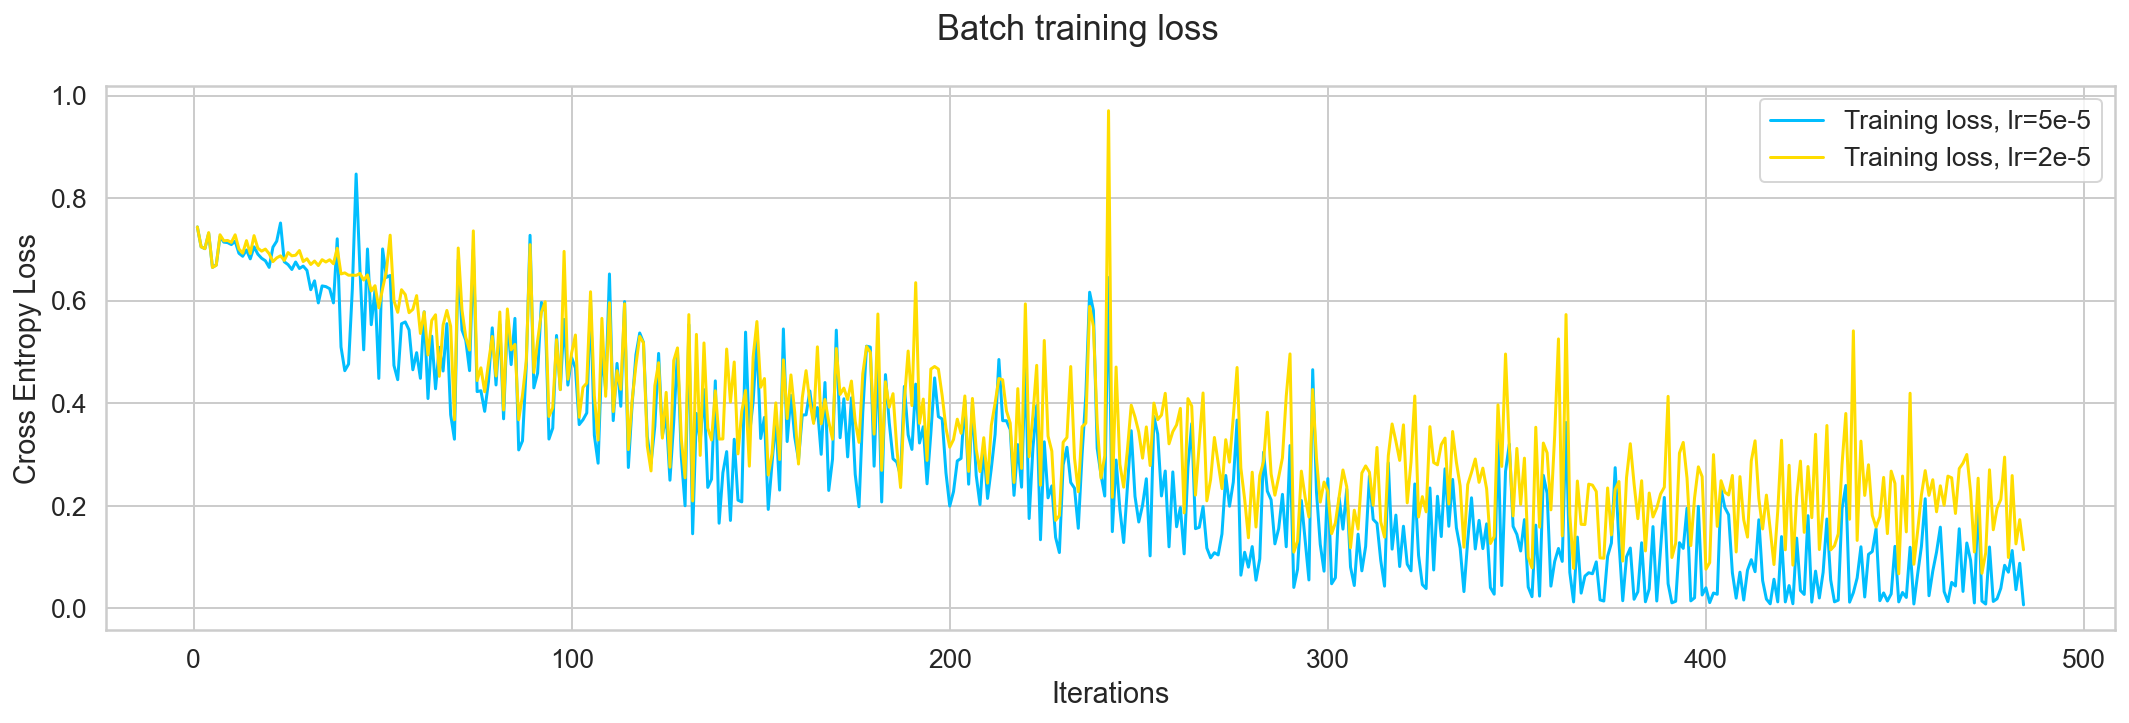

In [8]:
rcParams['figure.figsize'] = 18, 5

train_batch_loss_5 = train_results_5e5["training_batch_loss_values"]
train_batch_loss_2 = train_results_2e5["training_batch_loss_values"]
batch = [i for i in range(1, len(train_batch_loss_5)+1)]

sns.lineplot(x=batch, y=train_batch_loss_5, label="Training loss, lr=5e-5")
sns.lineplot(x=batch, y=train_batch_loss_2, label="Training loss, lr=2e-5")
plt.suptitle("Batch training loss")
# plt.suptitle("Cross entropy loss")
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.legend()

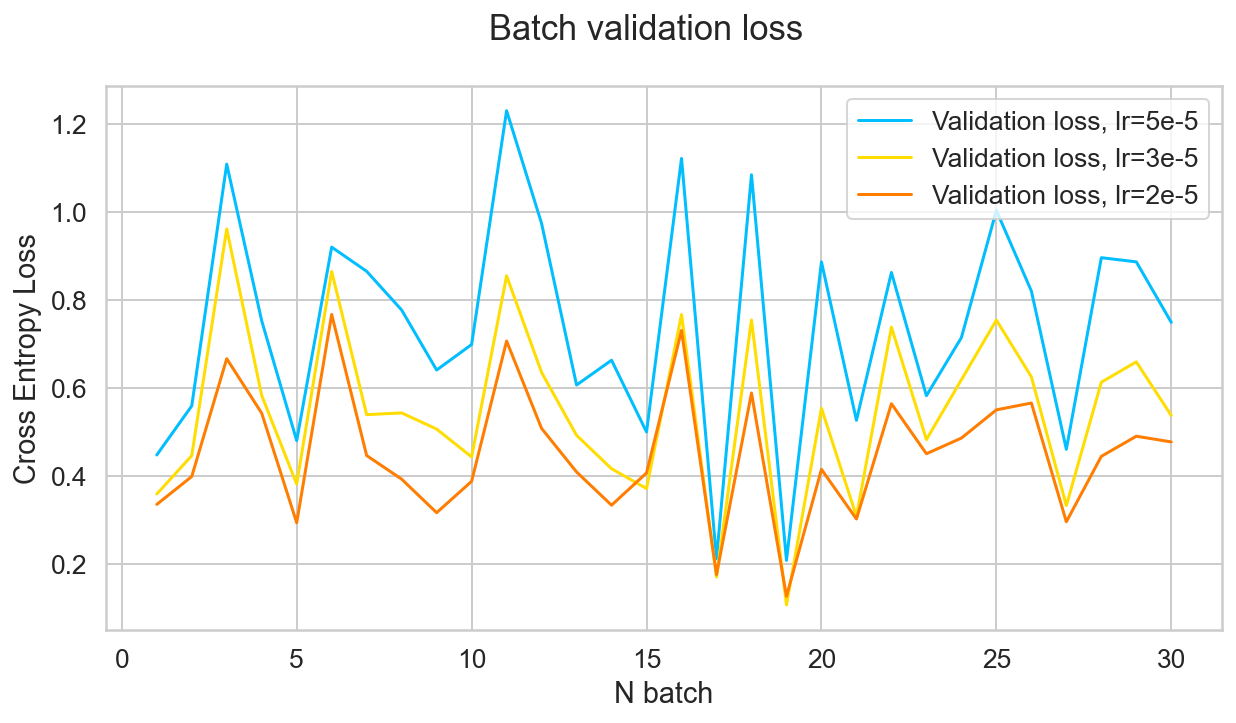

In [23]:
rcParams['figure.figsize'] = 10, 5
val_batch_loss_5 = val_results_5e5["validation_batch_loss_values"]
val_batch_loss_3 = val_results_3e5["validation_batch_loss_values"]
val_batch_loss_2 = val_results_2e5["validation_batch_loss_values"]

batch = [i for i in range(1, len(val_batch_loss_2)+1)]
sns.lineplot(x=batch, y=val_batch_loss_5, label="Validation loss, lr=5e-5")
sns.lineplot(x=batch, y=val_batch_loss_3, label="Validation loss, lr=3e-5")
sns.lineplot(x=batch, y=val_batch_loss_2, label="Validation loss, lr=2e-5")
plt.suptitle("Batch validation loss")
plt.xlabel('N batch')
plt.ylabel('Cross Entropy Loss')
plt.legend()

In [10]:
train_ys_5 = {
    "true_y": train_results_5e5["true_y"],
    "pred_y": train_results_5e5["pred_y"],
}
val_ys_5 = {
    "true_y": val_results_5e5["true_y"],
    "pred_y": val_results_5e5["pred_y"],
}
t_ys_df_5 = pd.DataFrame.from_dict(train_ys_5)
v_ys_df_5 = pd.DataFrame.from_dict(val_ys_5)

train_ys_2 = {
    "true_y": train_results_2e5["true_y"],
    "pred_y": train_results_2e5["pred_y"],
}
val_ys_2 = {
    "true_y": val_results_2e5["true_y"],
    "pred_y": val_results_2e5["pred_y"],
}
t_ys_df_2 = pd.DataFrame.from_dict(train_ys_2)
v_ys_df_2 = pd.DataFrame.from_dict(val_ys_2)

In [11]:
train_pred_y_5 = train_results_5e5["pred_y"][11532:] # grabbing the predictions of the last batch
train_pred_y_3 = train_results_3e5["pred_y"][11532:]
train_pred_y_2 = train_results_2e5["pred_y"][11532:]

train_true_y_5 = train_results_5e5["true_y"][11532:]
train_true_y_3 = train_results_3e5["true_y"][11532:]
train_true_y_2 = train_results_2e5["true_y"][11532:]

val_pred_y_5 = val_results_5e5["pred_y"]
val_pred_y_3 = val_results_3e5["pred_y"]
val_pred_y_2 = val_results_2e5["pred_y"]

val_true_y_5 = val_results_5e5["true_y"]
val_true_y_3 = val_results_3e5["true_y"]
val_true_y_2 = val_results_2e5["true_y"]

assert len(train_pred_y_5) == len(train_pred_y_3) == len(train_pred_y_2) == 3844
assert len(train_true_y_5) == len(train_true_y_3) == len(train_true_y_2) == 3844

assert len(val_pred_y_5) == len(val_pred_y_3) == len(val_pred_y_2) == 960
assert len(val_pred_y_5) == len(val_pred_y_3) == len(val_pred_y_2) == 960

c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DeboraOrsolich\AppData\Local\Temp\ipykernel_18836\1713726989.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


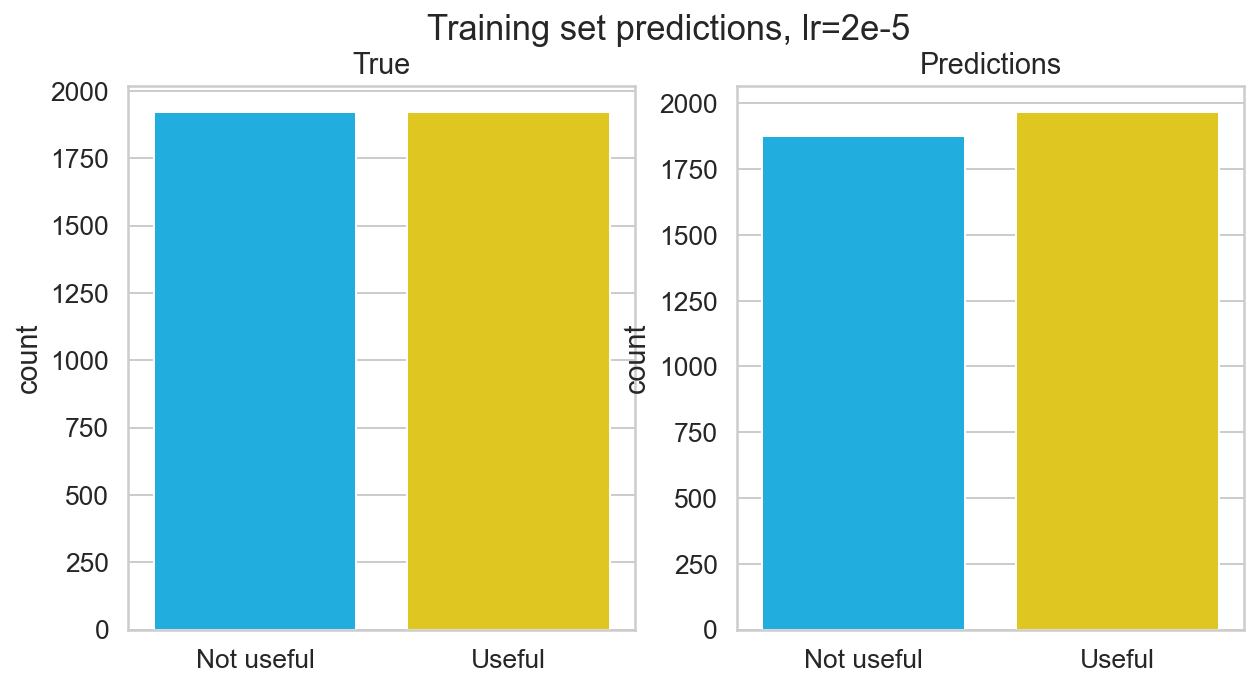

In [12]:
fig, ax =plt.subplots(1,2)
fig.suptitle("Training set predictions, lr=2e-5")
class_names = ['Not useful', 'Useful']
sns.countplot(train_true_y_2, ax=ax[0]).set_title("True")
sns.countplot(train_pred_y_2, ax=ax[1]).set_title("Predictions")
ax[0].set_xticklabels(class_names)
ax[1].set_xticklabels(class_names)
fig.show()

c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DeboraOrsolich\AppData\Local\Temp\ipykernel_18836\3996656315.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


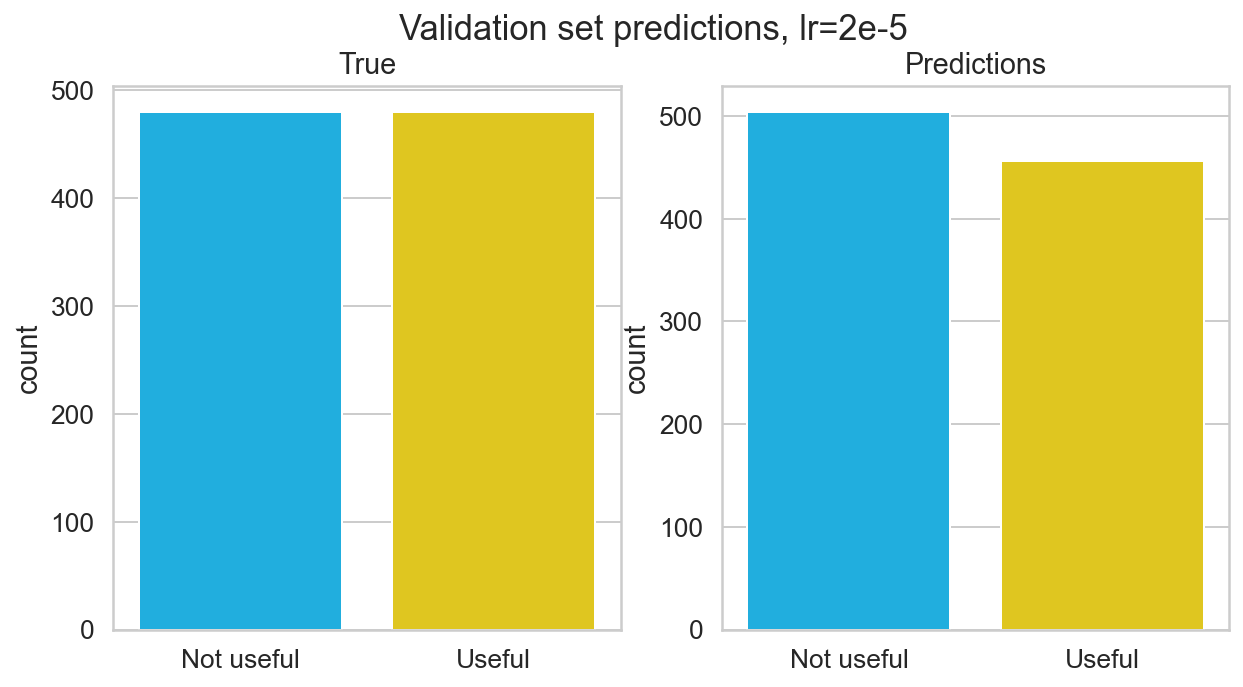

In [13]:
fig, ax =plt.subplots(1,2)
fig.suptitle("Validation set predictions, lr=2e-5")
class_names = ['Not useful', 'Useful']
sns.countplot(val_true_y_2, ax=ax[0]).set_title("True")
sns.countplot(val_pred_y_2, ax=ax[1]).set_title("Predictions")
ax[0].set_xticklabels(class_names)
ax[1].set_xticklabels(class_names)
fig.show()

In [14]:
# Confusion Matrix
print("****** 5e-5 ******")
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
train_cf_5= confusion_matrix(train_true_y_5, train_pred_y_5)
train_accuracy_5 = accuracy_score(train_true_y_5, train_pred_y_5)
train_recall_5 = recall_score(train_true_y_5, train_pred_y_5, average=None)
train_precision_5 = precision_score(train_true_y_5, train_pred_y_5, average=None)


val_cf_5 = confusion_matrix(val_true_y_5, val_pred_y_5)
val_accuracy_5 = accuracy_score(val_true_y_5, val_pred_y_5)
val_recall_5 = recall_score(val_true_y_5, val_pred_y_5, average=None)
val_precision_5 = precision_score(val_true_y_5, val_pred_y_5, average=None)

print("train_cf:    \n{}".format(train_cf_5))
print("train_accuracy:     {}".format(train_accuracy_5))
print("train_recall:       {}".format(train_recall_5))
print("train_precision:    {}".format(train_precision_5))

print()

print("val_cf:     \n{}".format(val_cf_5))
print("val_accuracy:       {}".format(val_accuracy_5))
print("val_recall:         {}".format(val_recall_5))
print("val_precision:      {}".format(val_precision_5))

****** 5e-5 ******
train_cf:    
[[1867   55]
 [  34 1888]]
train_accuracy:     0.9768470343392299
train_recall:       [0.97138398 0.98231009]
train_precision:    [0.98211468 0.97169326]

val_cf:     
[[410  70]
 [112 368]]
val_accuracy:       0.8104166666666667
val_recall:         [0.85416667 0.76666667]
val_precision:      [0.78544061 0.84018265]


In [15]:
# Confusion Matrix
print("****** 2e-5 ******")
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
train_cf_2= confusion_matrix(train_true_y_2, train_pred_y_2)
train_accuracy_2 = accuracy_score(train_true_y_2, train_pred_y_2)
train_recall_2 = recall_score(train_true_y_2, train_pred_y_2, average=None)
train_precision_2 = precision_score(train_true_y_2, train_pred_y_2, average=None)


val_cf_2 = confusion_matrix(val_true_y_2, val_pred_y_2)
val_accuracy_2 = accuracy_score(val_true_y_2, val_pred_y_2)
val_recall_2 = recall_score(val_true_y_2, val_pred_y_2, average=None)
val_precision_2 = precision_score(val_true_y_2, val_pred_y_2, average=None)

print("train_cf:    \n{}".format(train_cf_2))
print("train_accuracy:     {}".format(train_accuracy_2))
print("train_recall:       {}".format(train_recall_2))
print("train_precision:    {}".format(train_precision_2))

print()

print("val_cf:     \n{}".format(val_cf_2))
print("val_accuracy:       {}".format(val_accuracy_2))
print("val_recall:         {}".format(val_recall_2))
print("val_precision:      {}".format(val_precision_2))

****** 2e-5 ******
train_cf:    
[[1756  166]
 [ 121 1801]]
train_accuracy:     0.9253381893860562
train_recall:       [0.91363163 0.93704475]
train_precision:    [0.93553543 0.91560752]

val_cf:     
[[410  70]
 [ 94 386]]
val_accuracy:       0.8291666666666667
val_recall:         [0.85416667 0.80416667]
val_precision:      [0.81349206 0.84649123]


In [16]:
from sklearn.metrics import classification_report
print("****** 5e-5 ******")
print("Training set:")
print(classification_report(train_true_y_5, train_true_y_5, target_names=["Not useful", "useful"]))
print()
print("Validation set:")
print(classification_report(val_true_y_5, val_pred_y_5, target_names=["Not useful", "useful"]))

****** 5e-5 ******
Training set:
              precision    recall  f1-score   support

  Not useful       1.00      1.00      1.00      1922
      useful       1.00      1.00      1.00      1922

    accuracy                           1.00      3844
   macro avg       1.00      1.00      1.00      3844
weighted avg       1.00      1.00      1.00      3844


Validation set:
              precision    recall  f1-score   support

  Not useful       0.79      0.85      0.82       480
      useful       0.84      0.77      0.80       480

    accuracy                           0.81       960
   macro avg       0.81      0.81      0.81       960
weighted avg       0.81      0.81      0.81       960



In [17]:
print()
print("****** 2e-5 ******")
print("Training set:")
print(classification_report(train_true_y_2, train_pred_y_2, target_names=["Not useful", "useful"]))
print()
print("Validation set:")
print(classification_report(val_true_y_2, val_pred_y_2, target_names=["Not useful", "useful"]))


****** 2e-5 ******
Training set:
              precision    recall  f1-score   support

  Not useful       0.94      0.91      0.92      1922
      useful       0.92      0.94      0.93      1922

    accuracy                           0.93      3844
   macro avg       0.93      0.93      0.93      3844
weighted avg       0.93      0.93      0.93      3844


Validation set:
              precision    recall  f1-score   support

  Not useful       0.81      0.85      0.83       480
      useful       0.85      0.80      0.82       480

    accuracy                           0.83       960
   macro avg       0.83      0.83      0.83       960
weighted avg       0.83      0.83      0.83       960



****** 5e-5 ******


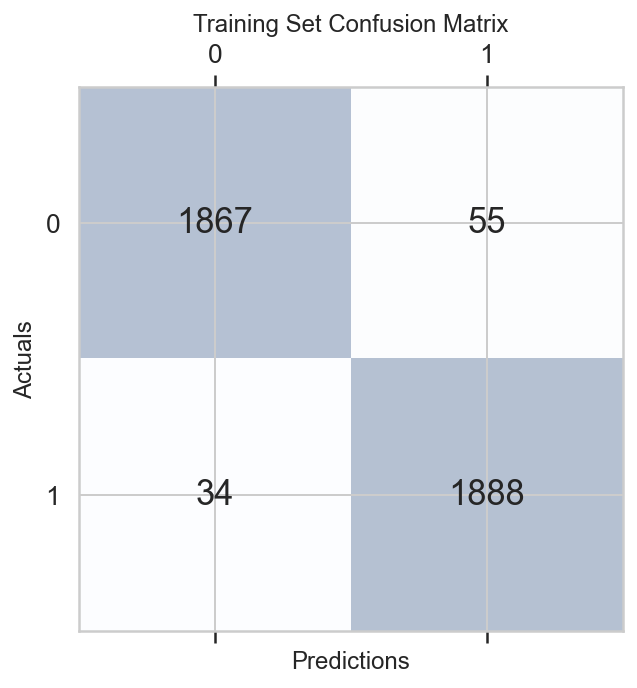

In [18]:
print("****** 5e-5 ******")
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(train_cf_5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(train_cf_5.shape[0]):
    for j in range(train_cf_5.shape[1]):
        ax.text(x=j, y=i,s=train_cf_5[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Training Set Confusion Matrix', fontsize=12)
plt.show()

****** 2e-5 ******


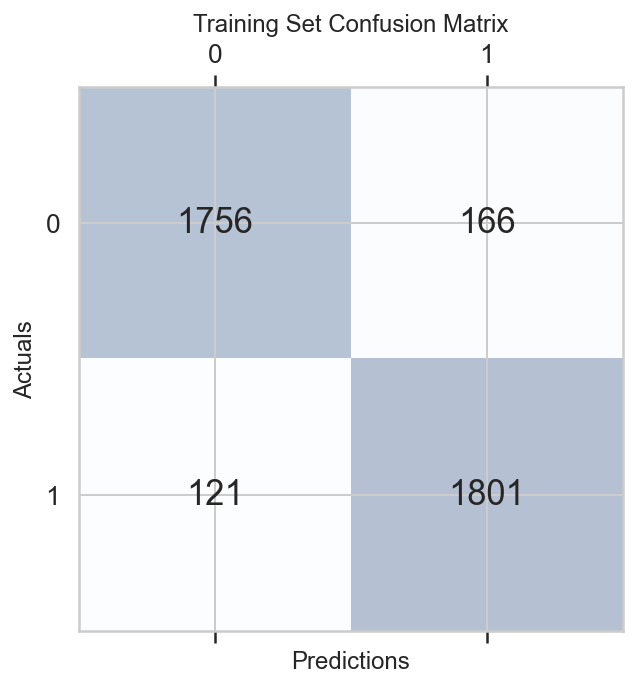

In [19]:
print("****** 2e-5 ******")
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(train_cf_2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(train_cf_2.shape[0]):
    for j in range(train_cf_2.shape[1]):
        ax.text(x=j, y=i,s=train_cf_2[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Training Set Confusion Matrix', fontsize=12)
plt.show()

****** 5e-5 ******


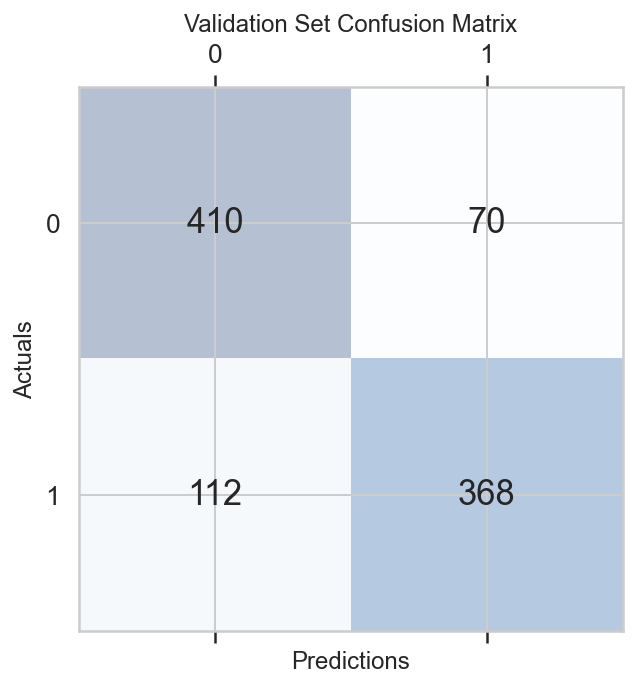

In [20]:
print("****** 5e-5 ******")
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(val_cf_5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(val_cf_5.shape[0]):
    for j in range(val_cf_5.shape[1]):
        ax.text(x=j, y=i,s=val_cf_5[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Validation Set Confusion Matrix', fontsize=12)
plt.show()

****** 2e-5 ******


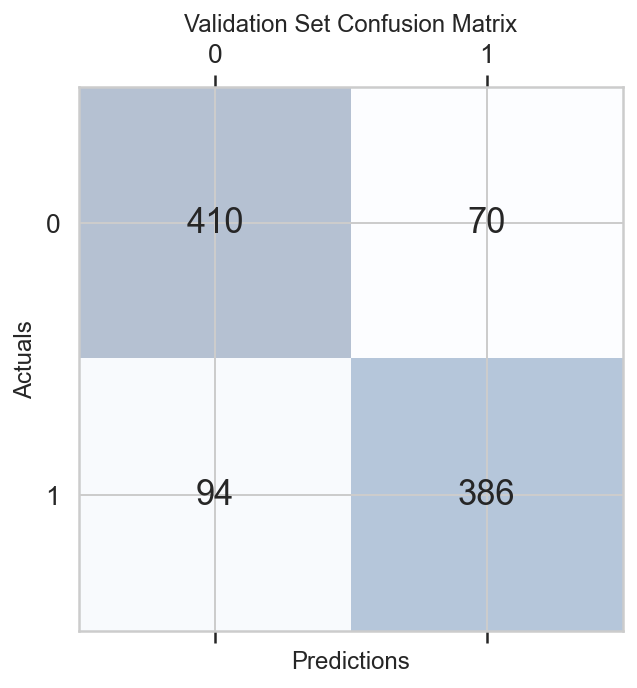

In [21]:
print("****** 2e-5 ******")
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(val_cf_2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(val_cf_2.shape[0]):
    for j in range(val_cf_2.shape[1]):
        ax.text(x=j, y=i,s=val_cf_2[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Validation Set Confusion Matrix', fontsize=12)
plt.show()